# **Twitter Sentiment Analysis**

<img src="messi.png">

Picture by ESPN on Twitter : https://twitter.com/ESPNFC/status/1465444697439191051?s=20

**Introduction**

The Ballon d'Or has just been awarded to Lionel Messi. People express their opinions on social media, including Twitter, despite the fact that it raises a lot of pros and cons. We'll try to find out what Twitter users have to say about Messi's new title. Although I am unconcerned with the Ballon d'Or, the controversy about Messi's title on Twitter is a fascinating research topic.

**Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

**Dataset**

Because of the constraints of the textblob library, I used data from 40000 tweets for the dataset, but only those tweets that use English. Check the twitter-api notebook to learn about how to crawl the data.

In [2]:
df = pd.read_csv('query_result.csv')

In [3]:
df = df.copy()

In [4]:
df.head()

,tweet_id,created_at,text,language,like,retweet
0,1466302275274436616,2021-12-02 07:04:39+00:00,"@OdehEmar I said ""Should""...\n\nI am repeating...",en,0,0
1,1466302270707019777,2021-12-02 07:04:38+00:00,@Deputatipd @ElenaCarnevali @pdnetwork Non dim...,it,0,0
2,1466302260430790662,2021-12-02 07:04:36+00:00,"@BocahDukun @breathe_010 @GOAL_ID Maaf bos, da...",in,0,0
3,1466302256320598018,2021-12-02 07:04:35+00:00,@LeventUzumcu Messi 'de benim alanım futbol de...,tr,0,0
4,1466302254219243525,2021-12-02 07:04:34+00:00,@qhuarkhu @TechnoG88176286 Brace yourself for ...,en,0,0


**Filter The Language**

In [5]:
newdf = df.loc[df['language'] == 'en']

In [6]:
newdf = newdf.copy()

In [7]:
newdf['newtext'] = newdf['text'].copy()

In [8]:
newdf.head()

,tweet_id,created_at,text,language,like,retweet,newtext
0,1466302275274436616,2021-12-02 07:04:39+00:00,"@OdehEmar I said ""Should""...\n\nI am repeating...",en,0,0,"@OdehEmar I said ""Should""...\n\nI am repeating..."
4,1466302254219243525,2021-12-02 07:04:34+00:00,@qhuarkhu @TechnoG88176286 Brace yourself for ...,en,0,0,@qhuarkhu @TechnoG88176286 Brace yourself for ...
7,1466302115756879874,2021-12-02 07:04:01+00:00,@Morris_Monye It's so baffling that CR7's comm...,en,0,0,@Morris_Monye It's so baffling that CR7's comm...
8,1466302107221323776,2021-12-02 07:03:59+00:00,@GaneshMrshl @sapphistal @Fedrick27152900 @Evr...,en,0,0,@GaneshMrshl @sapphistal @Fedrick27152900 @Evr...
9,1466302039051452416,2021-12-02 07:03:43+00:00,PSG is still a shitty team belonging to the fa...,en,0,0,PSG is still a shitty team belonging to the fa...


**Data Cleaning**

In [9]:
newdf['newtext'] = newdf['newtext'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

In [10]:
newdf.head()

,tweet_id,created_at,text,language,like,retweet,newtext
0,1466302275274436616,2021-12-02 07:04:39+00:00,"@OdehEmar I said ""Should""...\n\nI am repeating...",en,0,0,I said Should I am repeating this again coz I ...
4,1466302254219243525,2021-12-02 07:04:34+00:00,@qhuarkhu @TechnoG88176286 Brace yourself for ...,en,0,0,Brace yourself for Messi He had the same stats...
7,1466302115756879874,2021-12-02 07:04:01+00:00,@Morris_Monye It's so baffling that CR7's comm...,en,0,0,Monye It s so baffling that CR7 s comment trig...
8,1466302107221323776,2021-12-02 07:03:59+00:00,@GaneshMrshl @sapphistal @Fedrick27152900 @Evr...,en,0,0,official If that cup was so good nymar should ...
9,1466302039051452416,2021-12-02 07:03:43+00:00,PSG is still a shitty team belonging to the fa...,en,0,0,PSG is still a shitty team belonging to the fa...


**Natural Language Preprocessing**

In [11]:
newdf['analysis'] = newdf['newtext'].apply(lambda x: TextBlob(x))

In [12]:
newdf['polarity'] = newdf['analysis'].apply(lambda x: x.sentiment.polarity)

In [13]:
def conv_polarity(x):
    if x > 0:
        return 'positive'
    elif x==0:
        return 'neutral'
    else:
        return 'negative'

In [14]:
newdf['sentiment'] = newdf['polarity'].apply(lambda x: conv_polarity(x))

Text(0.5, 1.0, "Sentiment Result of Messi's Ballon d'Or")

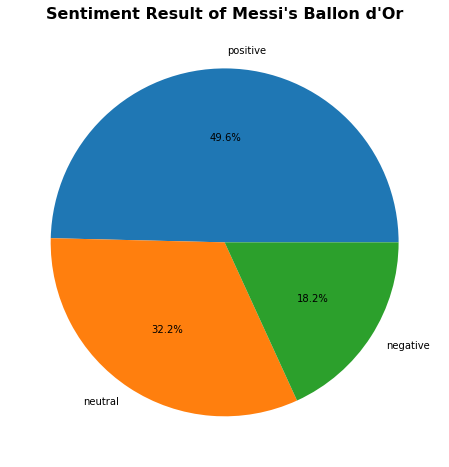

In [15]:
plt.figure(figsize=(8,8))
ratios = newdf['sentiment'].value_counts()
labels = newdf['sentiment'].unique()
plt.pie(ratios, autopct='%1.1f%%', labels=labels)
plt.title("Sentiment Result of Messi's Ballon d'Or", fontfamily='sans-serif', fontsize=16, fontweight="bold")

**Conclusion**

The dataset consists of 12951 English-language tweets. According to textblob's NLP results, 49 percent of individuals think Lionel Messi's title is a fair one. This is only part of what people are saying. In fact, while the Ballon d'Or was trending on Twitter, there were almost two million tweets on Messi.